<a href="https://colab.research.google.com/github/VinathiG/MiniProject/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install bing-image-downloader


In [6]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [7]:
from bing_image_downloader import downloader
downloader.download("pizza",limit=15,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/pizza


[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from http://cdn.wonderfuldiy.com/wp-content/uploads/2017/04/True-italian-pizza--1024x680.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://truepizza.co/wp-content/uploads/2020/04/true-pizza-03-1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.girlsofto.com/wp-content/uploads/2016/05/DSC03833.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://maegan.co/wp-content/uploads/2017/06/True-True-Pizza.png
[%] File Downloaded !

[%] Downloading Image #5 from http://trueitalian.top/wp-content/uploads/2020/10/copertina-Amburgo.jpg
[Error]Invalid image, not saving http://trueitalian.top/wp-content/uploads/2020/10/copertina-Amburgo.jpg

[!] Issue getting: http://trueitalian.top/wp-content/uploads/2020/10/copertina-Amburgo.jpg
[!] Error:: Invalid image, not saving http://trueitalian.top/wp-content/uploads/2020/10/copertin

In [8]:
downloader.download("tulips",limit=15,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/tulips


[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from https://img-aws.ehowcdn.com/default/ds-photo/getty/article/79/3/186487777.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.hadeco.co.za/wp-content/uploads/2018/02/elbo09319.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/37/8c/04/378c04ba30b402514f39f36eb2b02799.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://s3-us-west-2.amazonaws.com/distiller-blog-prod/wp-content/uploads/2018/03/23143351/title8.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://3.bp.blogspot.com/-I7e7aWu0EyU/T18MTSjjMFI/AAAAAAAADBE/GyGWQUnK4XM/s1600/2+spring-flowers-yellow-tulips_all-hit-movies.blogspot.in.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/48/6d/6d/486d6d39f86d5c5eb2bc348c98c5ce4e.jpg
[%] File Downloaded !

[%] Downloading Image #7 from h

In [9]:
downloader.download("pugs",limit=15,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/pugs


[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/ae/0b/19/ae0b19f2630a164b123d802264b2b03a--necklaces-model.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.petpress.net/wp-content/uploads/2019/11/12173643/72395342_2239326639700551_4017999226296119195_n.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.petpress.net/wp-content/uploads/2019/11/12173652/72412658_566634780737273_3064416333588612544_n1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn.petpress.net/wp-content/uploads/2019/11/12173638/73216163_126079255099720_9038622170265191634_n.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.redd.it/4bb9bfkp1fx01.jpg
[Error]Invalid image, not saving https://i.redd.it/4bb9bfkp1fx01.jpg

[!] Issue getting: https://i.redd.it/4bb9bfkp1fx01.jpg
[!] Error:: Invalid image, not saving https://i.redd.it/4bb9bfkp

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread 
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
DATADIR='/content/images'
CATEGORIES=['pizza','tulips','pugs']
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  print(class_num)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)




0
1
2


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,
                                test_size=0.3,random_state=109)

In [13]:
  from sklearn.model_selection import GridSearchCV
  from sklearn import svm
  param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
  ]
  svc=svm.SVC(probability=True)
  clf=GridSearchCV(svc,param_grid)
  clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
y_pred=clf.predict(x_test)
y_pred

array([2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1])

In [15]:
y_test

array([2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 2, 1])

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
accuracy_score(y_pred,y_test)

0.6428571428571429

In [18]:
confusion_matrix(y_pred,y_test)

array([[2, 1, 3],
       [0, 4, 1],
       [0, 0, 3]])

In [19]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [20]:
model=pickle.load(open('img_model.p','rb'))

Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/8/86/Pizza_%281%29.jpg
(1809, 2700, 3)
PREDICTED OUTPUT: pugs


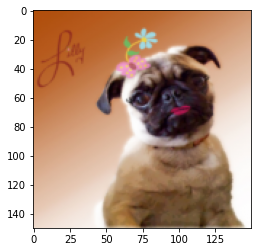

In [24]:
flat_data=[]
url=input('Enter your URL')
img=imread(url)
img_resize=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

     |████████████████████████████████| 8.2MB 16.3MB/s 
     |████████████████████████████████| 174kB 60.3MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 4.2MB 42.2MB/s 
     |████████████████████████████████| 112kB 52.7MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 122kB 52.2MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=62cd4b54e2aff0bb2de227fb00b6fa0e8562972ab5646e8ca7f9868240dee9f1
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 747kB 32.1MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=696b2129be381db524e02c1bfbebdf8e4f27a9f4e6ff87c729dcbd87c4792e84
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
